The goal of this assignment is to classify x-ray of patients chests into two categories: healthy and diagnosed with penumonia.

In [1]:
import os
os.listdir("chest_xray/")

['.DS_Store', 'test', 'chest_xray', '__MACOSX', 'train', 'val']

In [2]:
#read the files and organize them into training and testing samples

training_files_to_label = {}
for file in os.listdir("chest_xray/train/NORMAL"):
    training_files_to_label[os.path.join("chest_xray/train/NORMAL", file)] = 0

for file in os.listdir("chest_xray/train/PNEUMONIA"):
    training_files_to_label[os.path.join("chest_xray/train/PNEUMONIA", file)] = 1
    
for file in os.listdir("chest_xray/val/NORMAL"):
    training_files_to_label[os.path.join("chest_xray/val/NORMAL", file)] = 0

for file in os.listdir("chest_xray/val/PNEUMONIA"):
    training_files_to_label[os.path.join("chest_xray/val/PNEUMONIA", file)] = 1
    
testing_files_to_label = {}
for file in os.listdir("chest_xray/test/NORMAL"):
    testing_files_to_label[os.path.join("chest_xray/test/NORMAL", file)] = 0

for file in os.listdir("chest_xray/test/PNEUMONIA"):
    testing_files_to_label[os.path.join("chest_xray/test/PNEUMONIA", file)] = 1

In [56]:
from matplotlib import image
import numpy as np
import cv2

# the width and heights of the images
width = 32 * 4
height = 32 * 5


def picture_to_array(filename, width, height):
    picture = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
    picture = cv2.resize(picture, (width, height), cv2.INTER_AREA)
    return picture

def get_array_and_labels(training_files_to_label, height, width):
    training_array =  np.zeros( (len(training_files_to_label), height, width , 1) )
    training_labels = np.zeros( (len(training_files_to_label)), dtype=np.int8)
    training_labels_triple = np.zeros( (len(training_files_to_label)) , dtype=np.int8)

    for i, filename in enumerate(training_files_to_label):
        pic = picture_to_array(filename, width, height)
        #occasionally a b-and-white image will be loaded as coloured, but the three rgb dimensions are identical
        #if this happens, just take the first colour dimension
        if len(pic.shape) == 3: 
            assert all( [np.all(pic[:,:,0] == pic[:,:,1]), np.all(pic[:,:,1] == pic[:,:,2]), np.all(pic[:,:,0] == pic[:,:,2]) ] )
            pic = pic[:, :, 0]
        training_array[i, :, :, 0] = pic
        training_labels[i] = training_files_to_label[filename]
        training_labels_triple[i] = 0
        if "bacteria" in filename: training_labels_triple[i] = 1
        if "virus" in filename: training_labels_triple[i] = 2
            
    #shuffle everything.
    np.random.seed(13371337)
    shuffle = np.arange(0, len(training_files_to_label) )
    np.random.shuffle(shuffle)
    training_array = training_array[shuffle, :, :, :]
    training_labels = training_labels[shuffle]
    training_labels_triple = training_labels_triple[shuffle]
    
    return training_array, training_labels, training_labels_triple

training_array, training_labels, training_labels_triple = get_array_and_labels(training_files_to_label, height, width)

In [4]:
from tensorflow.keras import datasets, layers, models
import tensorflow.keras as keras
def get_network(flavour, width, height):
    if flavour == "SimpleModel":
        inputs = keras.Input((height, width,1), name="INPUT")

        x = layers.Conv2D(filters=4, kernel_size=5, activation="relu")(inputs)
        x = layers.MaxPool2D(pool_size=2)(x)

        x = layers.Conv2D(filters=8, kernel_size=4, activation="relu")(x)
        x = layers.MaxPool2D(pool_size=2)(x)

        x = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x)
        x = layers.MaxPool2D(pool_size=2)(x)

        x = layers.GlobalAveragePooling2D()(x)
        x = layers.Dense(units=30, activation="relu")(x)

        outputs = layers.Dense(units = 1,activation="sigmoid")(x)

        # Define the model.
        model = keras.Model(inputs, outputs, name=flavour)
        return model
    
    if flavour == "ComplexModel":
        inputs = keras.Input((height, width,1), name="INPUT2")

        x = layers.Conv2D(filters=8, kernel_size=5, activation="relu")(inputs)
        x = layers.MaxPool2D(pool_size=2)(x)

        x = layers.Conv2D(filters=16, kernel_size=4, activation="relu")(x)
        x = layers.MaxPool2D(pool_size=2)(x)

        x = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x)
        x = layers.MaxPool2D(pool_size=2)(x)

        x = layers.GlobalAveragePooling2D()(x)
        x = layers.Dense(units=30, activation="relu")(x)

        outputs = layers.Dense(units = 1,activation="sigmoid")(x)

        # Define the model.
        model = keras.Model(inputs, outputs, name=flavour)
        return model
    
    if flavour == "MediumModel":
        inputs = keras.Input((height, width,1), name="INPUT3")

        x = layers.Conv2D(filters=6, kernel_size=5, activation="relu")(inputs)
        x = layers.MaxPool2D(pool_size=2)(x)

        x = layers.Conv2D(filters=12, kernel_size=4, activation="relu")(x)
        x = layers.MaxPool2D(pool_size=2)(x)

        x = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x)
        x = layers.MaxPool2D(pool_size=2)(x)

        x = layers.GlobalAveragePooling2D()(x)
        x = layers.Dense(units=30, activation="relu")(x)

        outputs = layers.Dense(units = 1,activation="sigmoid")(x)

        # Define the model.
        model = keras.Model(inputs, outputs, name=flavour)
        return model
    
    else: raise ValueError("Couldn't find the model {}".format(flavour))

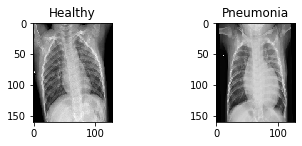

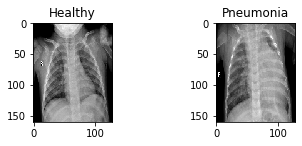

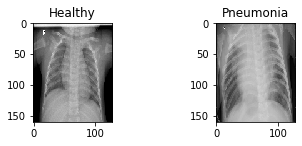

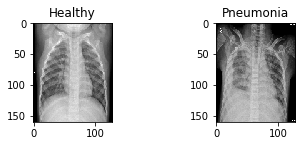

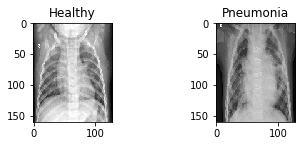

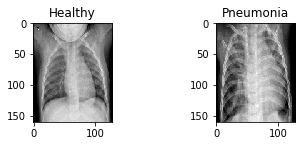

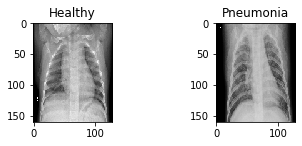

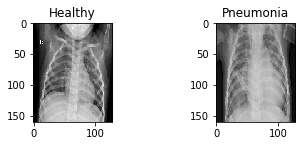

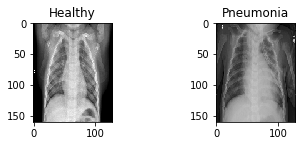

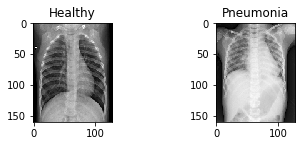

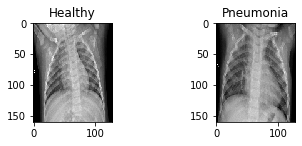

In [17]:
#show one of the images
import matplotlib.pyplot as plt

#Show ten example images with matplotlib
run = True
count = 0
plotted = 0
while run:
    plt.subplot(221)
    while training_labels[count] != 0: count += 1
    plotted += 1
    plt.imshow(training_array[count][:,:,0], cmap='gray')
    plt.title("Healthy")
    plt.subplot(222)
    while training_labels[count] != 1: count += 1
    plt.imshow(training_array[count][:,:,0], cmap='gray')
    plt.title("Pneumonia")
    plt.show()
    if plotted > 10: run = False

In [73]:

#split into training and validation sets

def get_training_validation_split(training_array, training_labels):
    n_training = int((3./4.) * len(training_array))
    training_array_split = training_array[:n_training]
    training_labels_split = training_labels[:n_training]

    validation_array_split = training_array[n_training:]
    validation_labels_split = training_labels[ n_training:]
    
    return training_array_split, training_labels_split, validation_array_split, validation_labels_split

def train_model(model_name, training_array, training_labels, height, width, extra_descr = ""):
    training_array_split, training_labels_split,\
    validation_array_split, validation_labels_split =\
    get_training_validation_split(training_array, training_labels)
    
    network = get_network(model_name, width, height)
    network.compile(optimizer='adam',
              loss=keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision()])
    network.summary()
    history = network.fit(training_array_split, training_labels_split.reshape(-1, 1),\
                          batch_size = 32, epochs=10000000, validation_data = (validation_array_split, validation_labels_split.reshape(-1, 1)),\
    callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',\
                                               min_delta=0, patience=5, verbose=0, mode='auto', restore_best_weights=True)]\
                         )
    #save the history    
    with open('trainHistoryDict_{}.pkl'.format(model_name + extra_descr), 'wb') as file_pi:
        pickle.dump(history.history, file_pi)
        
    network.save(model_name + extra_descr + ".kerasmodel")
    
    
import pickle

#train with different network architectures
for model_name in ["ComplexModel", "MediumModel"]: #"SimpleModel",:
    continue # comment to train
    train_model(model_name, training_array, training_labels, height, width, extra_descr = "")

    
    

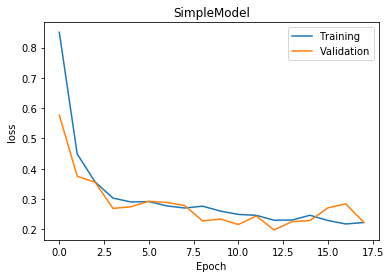

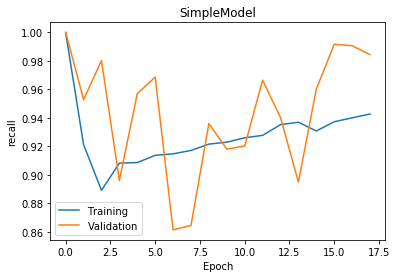

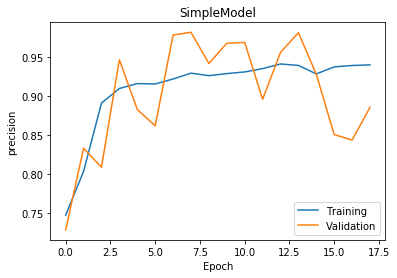

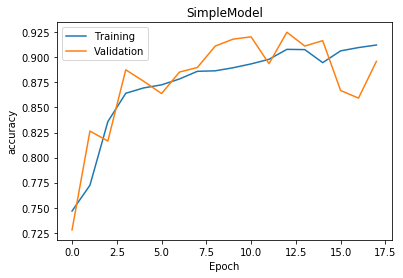

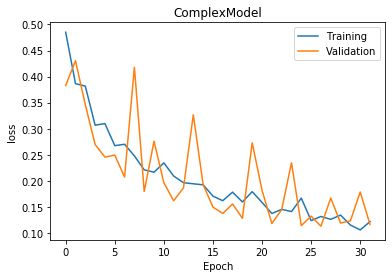

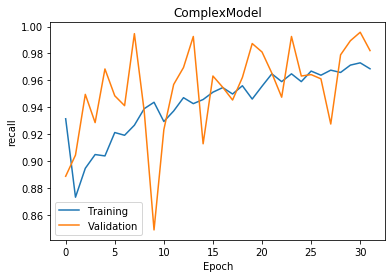

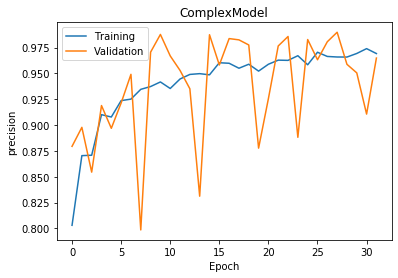

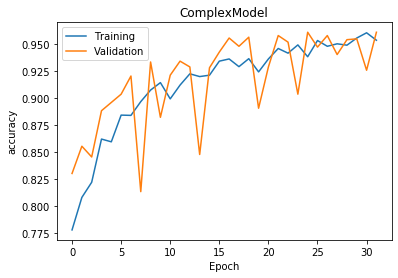

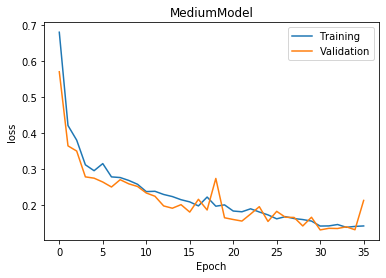

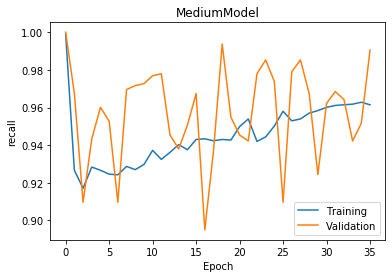

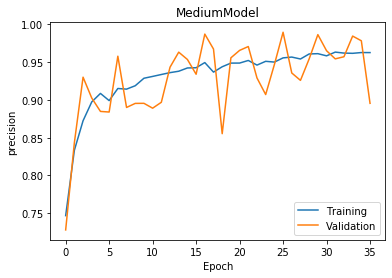

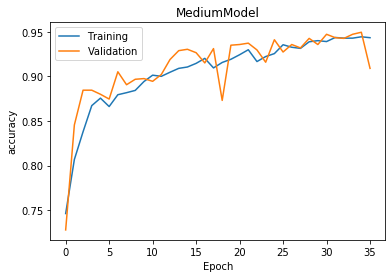

In [51]:
#study the performance of each model:
maximums = {}
maximums_val = {}
for model in ["SimpleModel", "ComplexModel", "MediumModel"]:
    maximums[model] = {}
    maximums_val[model] = {}
    with open('trainHistoryDict_{}.pkl'.format(model), 'rb') as file_pi:
        history = pickle.load(file_pi)
    for metric in ["loss", "recall", "precision", "accuracy"]:
        metric_key = None
        for el in history:
            if metric in el: metric_key = el
        metric_key = metric_key.replace("val_", "")
        plt.plot(history[metric_key], label="Training")
        plt.plot(history["val_" + metric_key], label="Validation")
        plt.ylabel(metric)
        plt.xlabel("Epoch")
        plt.title(model)
        plt.legend()
        
        if metric == "loss": maximums_val[model][metric] = min(history["val_" + metric_key])
        else: maximums_val[model][metric] = max(history["val_" + metric_key])
            
        if metric == "loss": maximums[model][metric] = min(history[metric_key])
        else: maximums[model][metric] = max(history[metric_key])
            
        plt.show()

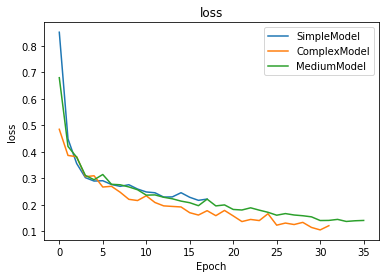

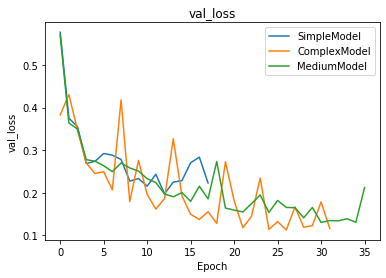

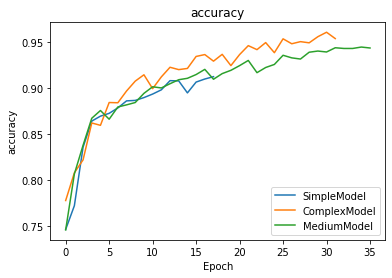

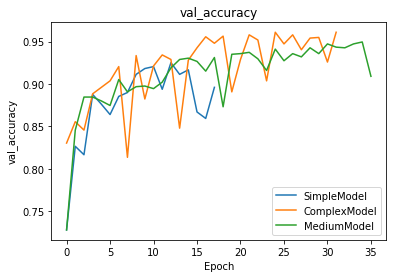

In [52]:
for metric in ["loss", "accuracy"]:
    for prefix in ["", "val_"]:
        metric_key = prefix + metric
        for model in ["SimpleModel", "ComplexModel", "MediumModel"]:
            with open('trainHistoryDict_{}.pkl'.format(model), 'rb') as file_pi:
                history = pickle.load(file_pi)
                
            plt.plot(history[metric_key], label=model)

            plt.ylabel(metric_key)
            plt.xlabel("Epoch")
            plt.legend()
            
        plt.title(metric_key)
            
        plt.show()

In [53]:
maximums

#the complex model as the best accuracy

{'SimpleModel': {'loss': 0.2172275334596634,
  'recall': 0.9996588230133057,
  'precision': 0.9412774443626404,
  'accuracy': 0.9123343229293823},
 'ComplexModel': {'loss': 0.10574973374605179,
  'recall': 0.9730467200279236,
  'precision': 0.9740437269210815,
  'accuracy': 0.9604994654655457},
 'MediumModel': {'loss': 0.1376771777868271,
  'recall': 0.998976469039917,
  'precision': 0.9634062647819519,
  'accuracy': 0.9444444179534912}}

In [54]:
maximums_val

#the complex model has the best validation accuracy

{'SimpleModel': {'loss': 0.19758906960487366,
  'recall': 1.0,
  'precision': 0.982100248336792,
  'accuracy': 0.925076425075531},
 'ComplexModel': {'loss': 0.11288512498140335,
  'recall': 0.9957982897758484,
  'precision': 0.9899103045463562,
  'accuracy': 0.96100914478302},
 'MediumModel': {'loss': 0.13042327761650085,
  'recall': 1.0,
  'precision': 0.9897142648696899,
  'accuracy': 0.9495412707328796}}

In [63]:
#study different image resolutions:

#lets try doubling the resolution
#train the different network architectures
for model_name in ["ComplexModel"]: #"SimpleModel",:
    #get data with double the resolution
    double_training_array, double_training_labels, double_training_labels_triple = get_array_and_labels(training_files_to_label, int(1.5*height), int(1.5*width))
    train_model(model_name, double_training_array, double_training_labels, int(1.5*height), int(1.5*width), extra_descr = "DoubleRes")
    
    

Model: "ComplexModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT2 (InputLayer)         [(None, 240, 192, 1)]     0         
                                                                 
 conv2d_45 (Conv2D)          (None, 236, 188, 8)       208       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 118, 94, 8)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 115, 91, 16)       2064      
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 57, 45, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 55, 43, 4)        

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
123/123 [==============================] - ETA: 0s - loss: 0.6381 - accuracy: 0.7370 - recall_14: 0.9795 - precision_14: 0.7471WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x16f4f0d90> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
123/123 [==============================] - 34s 268ms/step - loss: 0.6381 - accuracy: 0.7370 - recall_14: 0.9795 - precision_14: 0.7471 - val_loss: 0.7307 - val_accuracy: 0.7278 - val_recall_14: 1.0000 - val_precision_14: 0.7278
Epoch 2/10000000
123/123 [==============================] - 40s 328ms/step - loss: 0.5707 - accuracy: 0.7467 - recall_14: 0.9853 - precision_14: 0.7523 - val_loss: 0.5311 - val_accuracy: 0.7332 - val_recall_14: 0.9800 - val_precision_14: 0.7387
Epoch 3/10000000
123/123 [==============================] - 41s 331ms/step - loss: 0.5008 - accuracy: 0.7620 - recall_14: 0.9352 - precision_14: 0.7865 - val_loss: 0.4608 - val_accuracy: 0.7576 - val_recall_14: 0.967

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: ComplexModelDoubleRes.kerasmodel/assets


INFO:tensorflow:Assets written to: ComplexModelDoubleRes.kerasmodel/assets


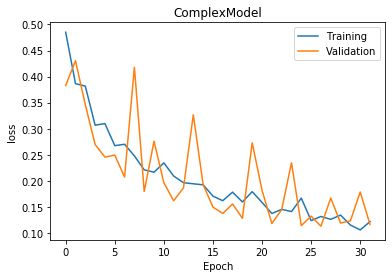

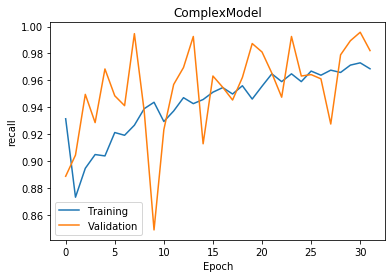

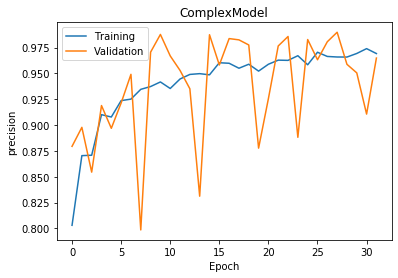

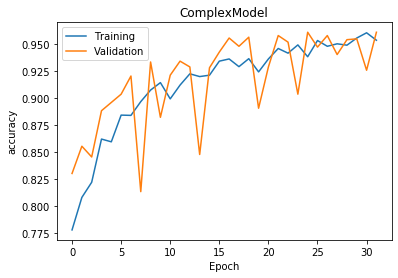

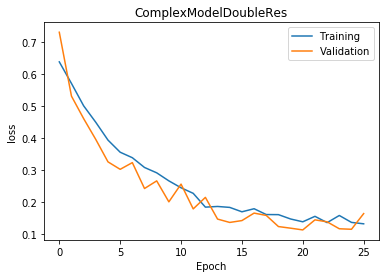

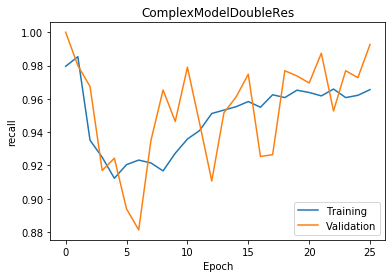

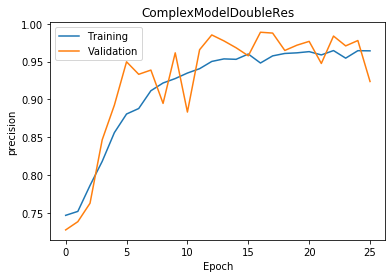

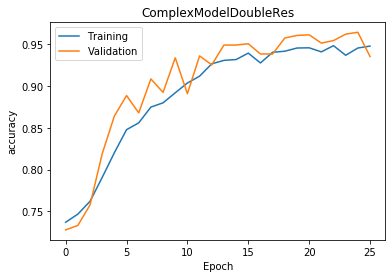

In [64]:
#study the performance of each model:
maximums2 = {}
maximums2_val = {}
for model in ["ComplexModel", "ComplexModel" + "DoubleRes"]:
    maximums2[model] = {}
    maximums2_val[model] = {}
    with open('trainHistoryDict_{}.pkl'.format(model), 'rb') as file_pi:
        history = pickle.load(file_pi)
    for metric in ["loss", "recall", "precision", "accuracy"]:
        metric_key = None
        for el in history:
            if metric in el: metric_key = el
        metric_key = metric_key.replace("val_", "")
        plt.plot(history[metric_key], label="Training")
        plt.plot(history["val_" + metric_key], label="Validation")
        plt.ylabel(metric)
        plt.xlabel("Epoch")
        plt.title(model)
        plt.legend()
        
        if metric == "loss": maximums2_val[model][metric] = min(history["val_" + metric_key])
        else: maximums2_val[model][metric] = max(history["val_" + metric_key])
            
        if metric == "loss": maximums2[model][metric] = min(history[metric_key])
        else: maximums2[model][metric] = max(history[metric_key])
            
        plt.show()

In [68]:
#increasing the resolution of the images does not seem to make much of a difference... 

print(maximums2_val)
print(maximums2)

{'ComplexModel': {'loss': 0.11288512498140335, 'recall': 0.9957982897758484, 'precision': 0.9899103045463562, 'accuracy': 0.96100914478302}, 'ComplexModelDoubleRes': {'loss': 0.11301784962415695, 'recall': 1.0, 'precision': 0.988776683807373, 'accuracy': 0.964067280292511}} {'ComplexModel': {'loss': 0.10574973374605179, 'recall': 0.9730467200279236, 'precision': 0.9740437269210815, 'accuracy': 0.9604994654655457}, 'ComplexModelDoubleRes': {'loss': 0.13209208846092224, 'recall': 0.9853292107582092, 'precision': 0.9645655751228333, 'accuracy': 0.9480122327804565}}


In [77]:
#lets evaluate the metrics on the testing sample now:
best_network = keras.models.load_model("ComplexModel.kerasmodel")
#we need to tune the selection
train, train_label, valid, valid_label = get_training_validation_split(training_array, training_labels)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [143]:
def calculate_accuracy(predictions, labels):
    predictions = 0*(predictions[:,0] < 0.5) + 1*(predictions[:,0] >= 0.5)
    return np.sum( 1 * (predictions == labels) )/float(len(labels))

def get_network_accuracy(network, data, labels):
    pred = best_network.predict(data)
    return calculate_accuracy(pred, labels)

from sklearn.metrics import classification_report, confusion_matrix
def get_network_confusion(network, data, labels):
    pred = best_network.predict(data)
    pred = 0*(pred[:,0] < 0.5) + 1*(pred[:,0] >= 0.5)
    return confusion_matrix(pred, labels)
    



acc_val = get_network_accuracy(network, valid, valid_label)
conf_val = get_network_confusion(network, valid, valid_label)

In [145]:
acc_test = get_network_accuracy(network, testing_array, testing_labels)
conf_test = get_network_confusion(network,  testing_array, testing_labels)

In [151]:
print("The testing accuracy was {} %".format(acc_test * 100))

The testing accuracy was 75.0 %


In [149]:
#there's a lot of false positives. Not too many true negatives. 
#There is something fundamentally different about the testing sample.... 
#There is no evidence of overfitting to the validation sample during the training.
print(conf_test)

[[ 81   3]
 [153 387]]


In [148]:
#there's not many false positives in the validation sample
print(conf_val)

[[338  37]
 [ 18 915]]
